# Correlation function of DR72 SDSS VAGC Catalog

First import all the modules such as healpy and astropy needed for analyzing the structure

In [1]:
import healpix_util as hu
import astropy as ap
import numpy as np
from astropy.io import fits
from astropy.table import Table
import astropy.io.ascii as ascii
from astropy.io import fits
from astropy.constants import c
import matplotlib.pyplot as plt
import math as m
from math import pi
import scipy.special as sp
from scipy import integrate
import warnings
from sklearn.neighbors import BallTree
import pickle
import pymangle
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
dr7full=ascii.read("./input/DR7-Full.ascii")
dr7full

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64
56.1604523761,-0.221359772462,0.4501842,-22.0970516205,0.9943343,0.310859,1.7112147,1.0,0.9901478,32763,33480,784
58.247844859,0.216329004672,0.3671646,-21.8688602448,0.9533011,0.7922078,0.9208817,1.0,0.9506173,303471,311902,3790
54.445380928,0.619974218725,0.4133244,-21.7306137085,1.0,0.4315305,1.4082278,1.0,0.9183673,43630,44552,779
54.4879828915,0.485825651457,0.3224697,-21.8775806427,1.0,0.9240486,0.8174705,1.0,0.9183673,43622,44544,779
54.4932987631,0.483249792951,0.3226457,-21.6763000488,1.0,0.9249313,0.8168564,1.0,0.9183673,43622,44544,779
55.5558858448,0.582441686132,0.2334688,-21.5131568909,0.9943343,1.0009493,0.7672175,1.0,0.9901478,43723,44650,784
55.5686146471,0.608277412471,0.3136448,-21.5073776245,0.9943343,0.8425107,0.8784812,1.0,0.9901478,43727,44654,784
55.5972002797,0.434026434704,0.3517163,-21.5829257965,0.9943343,0.8903325,0.8416406,1.0,0.9901478,43731,44658,784
55.7617273511,0.495315330472,0.403208,-21.3501148224,0.9943343,0.4957986,1.2868758,1.0,0.9901478,43740,44667,784


In [3]:
z=dr7full['col3']
rad=dr7full['col1']
decd=dr7full['col2']

In [4]:
#Ez = lambda x: 1.0/m.sqrt(0.3*(1+x)**3+0.7)
Om=0.279
Ol=0.721
Ok=0.0
def Ez(zv):
    return 1.0/m.sqrt(Om*(1.0+zv)**3+Ok*(1.0+zv)**2+Ol)

np.vectorize(Ez)
#Calculate comoving distance of a data point using the Redshift - This definition is based on the cosmology model we take. Here the distance for E-dS universe is considered. Also note that c/H0 ratio is cancelled in the equations and hence not taken.

In [5]:
def DC_LCDM(z):
  return integrate.quad(Ez, 0, z)[0]
DC_LCDM=np.vectorize(DC_LCDM)

In [6]:
DC_LCDM(2.0)

array(1.232048694433717)

In [7]:
DC=DC_LCDM(z)
DC

0.405059971004
0.337292380754
0.37535589107
0.29951224831
0.299662811644
0.221552822632
0.29194457377
0.32433731955
0.367096478057
0.345409089706
0.162550123776


In [8]:
dr7f = open("./output/DR72srarfwmap9.dat",'w')
dr7f.write("z\t ra\t dec\t s\t rar\t decr \n")

for i in range(0,len(dr7full)):
    dr7f.write("%f\t " %z[i])
    dr7f.write("%f\t %f\t " %(rad[i],decd[i]))
    dr7f.write("%f\t " %DC[i])
    dr7f.write("%f\t %f\n " %(rad[i]*pi/180.0,decd[i]*pi/180.0))
dr7f.close()

In [9]:
data=ascii.read("./output/DR72srarfwmap9.dat")

In [10]:
data['z']

0.450184
0.367165
0.413324
0.32247
0.322646
0.233469
0.313645
0.351716
0.403208
0.37691
0.168714


In [11]:
data['s']

0.40506
0.337292
0.375356
0.299512
0.299663
0.221553
0.291945
0.324337
0.367096
0.345409
0.16255


In [12]:
data['rar']

0.980185
1.016617
0.950251
0.950995
0.951087
0.969633
0.969855
0.970354
0.973226
0.974112
0.97513


In [13]:
data['decr']

-0.003863
0.003776
0.010821
0.008479
0.008434
0.010166
0.010616
0.007575
0.008645
0.009094
0.008617


In [15]:
NSIDE=512
dr72hpix=hu.HealPix("ring",NSIDE)

In [16]:
pixdata = open("./output/pixdatadr72VAGCfullwmap9.dat",'w')
pixdata.write("z\t pix \n")

for i in range(0,len(data)):
    pixdata.write("%f\t" %data['z'][i])
    pixdata.write("%d\n" %dr72hpix.eq2pix(data['ra'][i],data['dec'][i]))
pixdata.close()

In [17]:
pixdata = ascii.read("./output/pixdatadr72VAGCfullwmap9.dat")
hpixdata=np.array(np.zeros(hu.nside2npix(NSIDE)))
for j in range(len(pixdata)):
    hpixdata[pixdata[j]['pix']]+=1

In [18]:
hpixdata

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

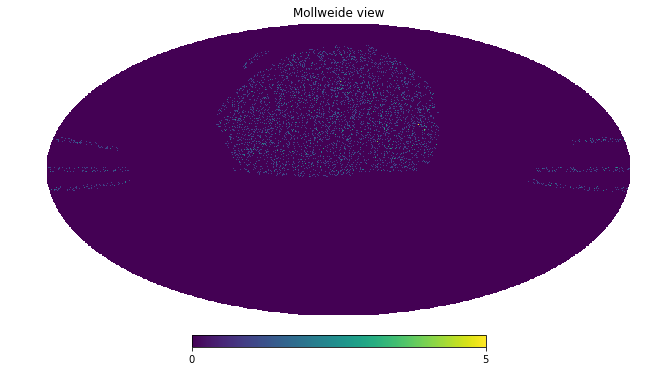

In [19]:
hu.mollview(hpixdata,rot=180)

In [ ]:
mangle=pymangle.Mangle("./masks/")

Ref: https://pypi.python.org/pypi/pymangle/

In [ ]:
%%time
rar,decr=mangle.genrand(2*len(data))

In [20]:
dataR=ascii.read("./output/rand200kdr72.dat")

In [21]:
dataR['z']

0.450184
0.367165
0.413324
0.32247
0.322646
0.233469
0.313645
0.351716
0.403208
0.37691
0.168714


In [22]:
dataR['ra']

171.460447
156.861634
135.655956
151.1135
327.045321
222.706587
132.163348
214.239217
310.627283
143.795051
168.941476


In [23]:
dataR['dec']

14.210816
40.750823
19.592957
24.245002
-7.737766
21.927202
15.281744
5.973424
1.01386
15.993848
43.319462


In [26]:
zr=np.array([data['z'],data['z']])

In [27]:
zr=zr.flatten()

In [28]:
DCr=DC_LCDM(zr)
DCr

array([ 0.40505981,  0.33729271,  0.37535557, ...,  0.33808417,
        0.21062015,  0.32041959])

In [29]:
rdr7f = open("./output/rDR72srarfwmap9.dat",'w')
rdr7f.write("z\t ra\t dec\t s\t rar\t decr \n")

for i in range(0,len(dataR)):
    rdr7f.write("%f\t " %zr[i])
    rdr7f.write("%f\t %f\t " %(dataR['ra'][i],dataR['dec'][i]))
    rdr7f.write("%f\t " %DCr[i])
    rdr7f.write("%f\t %f\n " %(dataR['ra'][i]*pi/180.0,dataR['dec'][i]*pi/180.0))
rdr7f.close()

In [31]:
dataR=ascii.read("./output/rDR72srarfwmap9.dat")

In [32]:
dataR['z']

0.450184
0.367165
0.413324
0.32247
0.322646
0.233469
0.313645
0.351716
0.403208
0.37691
0.168714


In [33]:
dat=ascii.read("./output/DR72srarfwmap9.dat")

In [34]:
dat=np.array([dat['s'],dat['rar'],dat['decr']])

In [35]:
dat.reshape(3,len(data['s']))

array([[ 0.40506 ,  0.337292,  0.375356, ...,  0.338084,  0.21062 ,
         0.32042 ],
       [ 0.980185,  1.016617,  0.950251, ...,  2.830242,  2.831786,
         2.838233],
       [-0.003863,  0.003776,  0.010821, ...,  0.172112,  0.173661,
         0.173055]])

In [36]:
dat=dat.transpose()

In [37]:
dat

array([[ 0.40506 ,  0.980185, -0.003863],
       [ 0.337292,  1.016617,  0.003776],
       [ 0.375356,  0.950251,  0.010821],
       ..., 
       [ 0.338084,  2.830242,  0.172112],
       [ 0.21062 ,  2.831786,  0.173661],
       [ 0.32042 ,  2.838233,  0.173055]])

In [38]:
from lcdmmetric import *

In [39]:
LCDMmetricsq(dat[0],dat[1])

0.004781790741834768

In [40]:
bins=np.arange(0.005,0.08,0.0025)

In [41]:
print bins

[ 0.005   0.0075  0.01    0.0125  0.015   0.0175  0.02    0.0225  0.025
  0.0275  0.03    0.0325  0.035   0.0375  0.04    0.0425  0.045   0.0475
  0.05    0.0525  0.055   0.0575  0.06    0.0625  0.065   0.0675  0.07
  0.0725  0.075   0.0775]


In [42]:
Nbins=len(bins)

In [43]:
Nbins

30

In [44]:
%%time
BT_D = BallTree(dat,metric='pyfunc',func=LCDMmetricsq,leaf_size=15) 

with open('BTDdr72wmap9.pkl', 'w') as f:
    pickle.dump(BT_D,f)

CPU times: user 5.19 s, sys: 57 ms, total: 5.25 s
Wall time: 5.29 s


In [45]:
with open('./BTDdr72wmap9.pkl') as f:
    BTD = pickle.load(f)
    
BTD

In [46]:
binsq=bins**2
binsq

array([  2.50000000e-05,   5.62500000e-05,   1.00000000e-04,
         1.56250000e-04,   2.25000000e-04,   3.06250000e-04,
         4.00000000e-04,   5.06250000e-04,   6.25000000e-04,
         7.56250000e-04,   9.00000000e-04,   1.05625000e-03,
         1.22500000e-03,   1.40625000e-03,   1.60000000e-03,
         1.80625000e-03,   2.02500000e-03,   2.25625000e-03,
         2.50000000e-03,   2.75625000e-03,   3.02500000e-03,
         3.30625000e-03,   3.60000000e-03,   3.90625000e-03,
         4.22500000e-03,   4.55625000e-03,   4.90000000e-03,
         5.25625000e-03,   5.62500000e-03,   6.00625000e-03])

In [47]:
%%time
counts_DD=BTD.two_point_correlation(dat,binsq)
print counts_DD

[   402929    774497   1364119   2237086   3458152   5093053   7210625
   9866681  13145795  17103872  21820618  27365402  33818809  41226191
  49633510  59101950  69686730  81431002  94385209 108550237 123968200
 140715893 158788908 178220065 198993309 221189433 244838889 269911660
 296471916 324567634]
CPU times: user 21min 43s, sys: 2.22 s, total: 21min 46s
Wall time: 21min 48s


In [48]:
with open('./DDDr72wmap9.pkl', 'w') as f:
    pickle.dump(counts_DD,f)

with open('./DDDr72wmap9.pkl') as f:
    counts_DD = pickle.load(f)
    
counts_DD

array([   402929,    774497,   1364119,   2237086,   3458152,   5093053,
         7210625,   9866681,  13145795,  17103872,  21820618,  27365402,
        33818809,  41226191,  49633510,  59101950,  69686730,  81431002,
        94385209, 108550237, 123968200, 140715893, 158788908, 178220065,
       198993309, 221189433, 244838889, 269911660, 296471916, 324567634])

In [49]:
DD=np.diff(counts_DD)
DD

array([  371568,   589622,   872967,  1221066,  1634901,  2117572,
        2656056,  3279114,  3958077,  4716746,  5544784,  6453407,
        7407382,  8407319,  9468440, 10584780, 11744272, 12954207,
       14165028, 15417963, 16747693, 18073015, 19431157, 20773244,
       22196124, 23649456, 25072771, 26560256, 28095718])

In [50]:
dataR=ascii.read("./output/rDR72srarfwmap9.dat")

In [51]:
dataR['z']

0.450184
0.367165
0.413324
0.32247
0.322646
0.233469
0.313645
0.351716
0.403208
0.37691
0.168714


In [52]:
datR=np.array([dataR['s'],dataR['rar'],dataR['decr']])

In [53]:
datR.reshape(3,len(dataR['s']))

array([[ 0.40506 ,  0.337293,  0.375356, ...,  0.311867,  0.338084,
         0.21062 ],
       [ 2.992549,  2.737752,  2.367643, ...,  3.228052,  3.218296,
         4.056418],
       [ 0.248026,  0.711236,  0.341962, ...,  0.199013,  0.052979,
         0.170602]])

In [54]:
datR=datR.transpose()

In [55]:
datR

array([[ 0.40506 ,  2.992549,  0.248026],
       [ 0.337293,  2.737752,  0.711236],
       [ 0.375356,  2.367643,  0.341962],
       ..., 
       [ 0.311867,  3.228052,  0.199013],
       [ 0.338084,  3.218296,  0.052979],
       [ 0.21062 ,  4.056418,  0.170602]])

In [56]:
LCDMmetricsq(datR[0],datR[1])

0.03986505718630143

In [57]:
%%time
BT_R = BallTree(datR,metric='pyfunc',func=LCDMmetricsq,leaf_size=15) 

with open('BTRdr72wmap9.pkl', 'w') as f:
    pickle.dump(BT_R,f)

CPU times: user 9.44 s, sys: 87.3 ms, total: 9.53 s
Wall time: 9.75 s


In [58]:
with open('./BTRdr72wmap9.pkl') as f:
    BTR = pickle.load(f)
    
BTR

In [59]:
%%time
counts_RR=BTR.two_point_correlation(datR,binsq)
print counts_RR

[    663614    1690321    3617352    6707338   11195146   17325909
   25347404   35542383   48237685   63721896   82264095  104139604
  129531349  158709548  191838963  229141038  270800677  316908009
  367677642  423223171  483733867  549293576  620082083  696207565
  777706638  864698484  957175479 1055197395 1158853225 1268156053]
CPU times: user 1h 10min 2s, sys: 4.76 s, total: 1h 10min 7s
Wall time: 1h 18min 1s


In [60]:
with open('./RRDr72wmap9.pkl', 'w') as f:
    pickle.dump(counts_RR,f)

with open('./RRDr72wmap9.pkl') as f:
    counts_RR = pickle.load(f)
    
counts_RR

array([    663614,    1690321,    3617352,    6707338,   11195146,
         17325909,   25347404,   35542383,   48237685,   63721896,
         82264095,  104139604,  129531349,  158709548,  191838963,
        229141038,  270800677,  316908009,  367677642,  423223171,
        483733867,  549293576,  620082083,  696207565,  777706638,
        864698484,  957175479, 1055197395, 1158853225, 1268156053])

In [61]:
RR=np.diff(counts_RR)
RR

array([  1026707,   1927031,   3089986,   4487808,   6130763,   8021495,
        10194979,  12695302,  15484211,  18542199,  21875509,  25391745,
        29178199,  33129415,  37302075,  41659639,  46107332,  50769633,
        55545529,  60510696,  65559709,  70788507,  76125482,  81499073,
        86991846,  92476995,  98021916, 103655830, 109302828])

In [62]:
%%time
counts_DR=BTR.two_point_correlation(dat,binsq)
print counts_DR

[   221572    731952   1698214   3241835   5491505   8564981  12598092
  17735330  24133056  31948692  41319344  52356484  65180683  79924039
  96676694 115512942 136561500 159903672 185618471 213722029 244346138
 277553025 313397812 351933936 393245984 437352562 484346982 534170394
 586815191 642313301]
CPU times: user 34min 37s, sys: 1.5 s, total: 34min 38s
Wall time: 34min 38s


In [63]:
with open('./DRDr72wmap9.pkl', 'w') as f:
    pickle.dump(counts_DR,f)

with open('./DRDr72wmap9.pkl') as f:
    counts_DR = pickle.load(f)
    
counts_DR

array([   221572,    731952,   1698214,   3241835,   5491505,   8564981,
        12598092,  17735330,  24133056,  31948692,  41319344,  52356484,
        65180683,  79924039,  96676694, 115512942, 136561500, 159903672,
       185618471, 213722029, 244346138, 277553025, 313397812, 351933936,
       393245984, 437352562, 484346982, 534170394, 586815191, 642313301])

In [64]:
DR=np.diff(counts_DR)
DR

array([  510380,   966262,  1543621,  2249670,  3073476,  4033111,
        5137238,  6397726,  7815636,  9370652, 11037140, 12824199,
       14743356, 16752655, 18836248, 21048558, 23342172, 25714799,
       28103558, 30624109, 33206887, 35844787, 38536124, 41312048,
       44106578, 46994420, 49823412, 52644797, 55498110])

In [65]:
from __future__ import division
correl=(4.0*DD-4.0*DR+1.0*RR)/(1.0*RR)

In [66]:
correl

array([ 0.45919527,  0.21819628,  0.13183555,  0.08320142,  0.06140557,
        0.04479701,  0.02650824,  0.01739651,  0.00348581, -0.00395989,
       -0.00429316, -0.0036005 , -0.00567879, -0.00760439, -0.00453479,
       -0.00469214, -0.00616535, -0.00537201, -0.00375532, -0.00518731,
       -0.00422618, -0.00421793, -0.00386712, -0.00805093, -0.00747162,
       -0.00976309, -0.01000437, -0.00658269, -0.00280633])

In [67]:
binMpc=c*1e-5*bins[1:len(bins)]
print binMpc

[  22.48443435   29.9792458    37.47405725   44.9688687    52.46368015
   59.9584916    67.45330305   74.9481145    82.44292595   89.9377374
   97.43254885  104.9273603   112.42217175  119.9169832   127.41179465
  134.9066061   142.40141755  149.896229    157.39104045  164.8858519
  172.38066335  179.8754748   187.37028625  194.8650977   202.35990915
  209.8547206   217.34953205  224.8443435   232.33915495] m / s


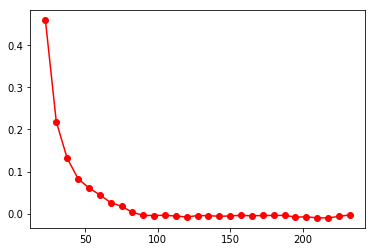

In [68]:
plt.plot(binMpc,correl,'ro-')

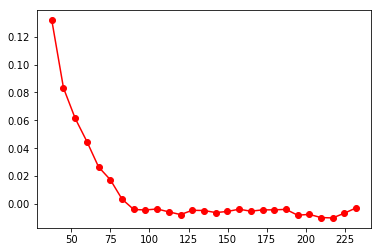

In [73]:
plt.plot(binMpc[2:],correl[2:],'ro-')

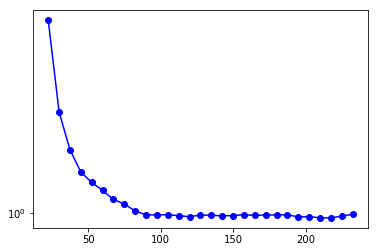

In [71]:
plt.yscale('log')
plt.plot(binMpc,correl+1.0,'bo-')
plt.show()

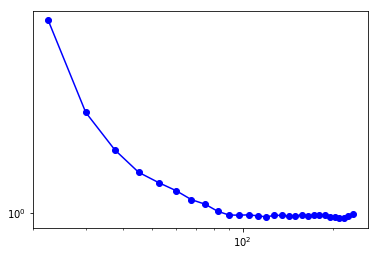

In [72]:
plt.xscale('log')
plt.yscale('log')
plt.plot(binMpc,correl+1.0,'bo-')
plt.show()